[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


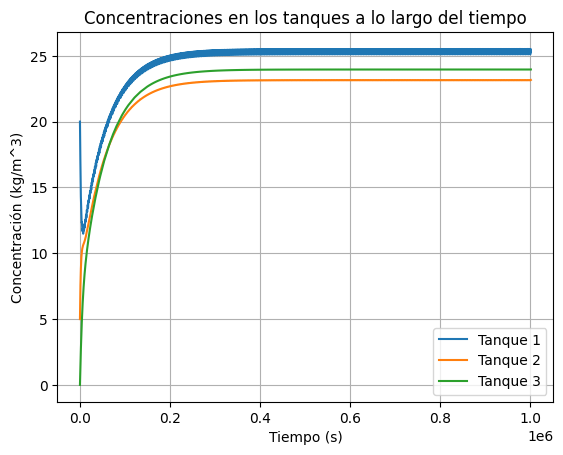

Volúmenes [m^3]: 1.0 1.2 1.5
Concentraciones iniciales [kg/m^3]: 20.0 5.0 0.0
Caudales externos [m^3/s]: Q0=0.000005, Q1=0.000025, Q2=0.000030, Q3=0.000010
Caudales internos [m^3/s]: QA=0.000312, QB=0.000264, QC=0.000200
c_Q0 = 0.0 kg/m^3
c_Q2 = 6.25 kg/m^3
Ejemplo c_Q1(t=0) = 50.0 kg/m^3


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Volúmenes de los tanques (m^3)
V1 = 1.0
V2 = 1.2
V3 = 1.5

# Concentraciones iniciales (kg/m^3)
C1_0 = 20.0
C2_0 = 5.0
C3_0 = 0.0

# Conversión de caudales: L/min -> m^3/s
def Lmin_to_m3s(Q_Lmin):
    return (Q_Lmin / 1000.0) / 60.0

# Caudales externos (m^3/s)
Q0 = Lmin_to_m3s(0.3)
Q1 = Lmin_to_m3s(1.5)
Q2 = Lmin_to_m3s(1.8)
Q3 = Lmin_to_m3s(0.6)

# Caudales internos (calculados previamente por balance) en L/min -> m^3/s
QA = Lmin_to_m3s(18.72)
QB = Lmin_to_m3s(15.84)
QC = Lmin_to_m3s(12.0)

# Concentraciones de alimentación (kg/m^3)
c_Q0 = 0.0                    # Línea 0
c_Q2 = 6.25e3 / 1000.0        # Línea 2: 6.25×10^3 g/m^3 -> 6.25 kg/m^3

# Concentración de Línea 1 es variable:
# c_Q1(t) = c1*(2.0 + sin(0.003491 t) + 0.3 sin(0.005236 t))
# con c1 = 2.5e4 g/m^3 = 25 kg/m^3

c1 = 2.5e4 / 1000.0   # 25 kg/m^3

def c_Q1(t):
    return c1 * (2.0 + np.sin(0.003491*t) + 0.3*np.sin(0.005236*t))

# Definición de tiempo
t = 0.0         # Tiempo inicial (s)
t_final = 1002000.0    # Tiempo final (s)
dt = 1   # Paso de tiempo (s)

#creación del vector de tiempo
time_vector = np.arange(t, t_final + dt, dt)

#creación de la matriz para almacenar las concentraciones
x_t = np.zeros(len(time_vector))
y_t = np.zeros(len(time_vector))
z_t = np.zeros(len(time_vector))
concentrations = np.zeros((len(time_vector), 3))  # 3 tanques
print(concentrations)
#rellenar la primera fila con las concentraciones iniciales
x_t[0] = C1_0
y_t[0] = C2_0
z_t[0] = C3_0
concentrations[0, :] = [C1_0, C2_0, C3_0]
#simulación (bucle temporal)
for i in range(len(time_vector)):
    x_t[i+1] = x_t[i] + dt * (Q1*c_Q1(time_vector[i]) +(1/2)*QB*y_t[i] + (3/4)*QC*z_t[i] - QA*x_t[i]) / V1
    y_t[i+1] = y_t[i] + dt * ((3/4)*QA*x_t[i] + Q2*c_Q2 - QB*y_t[i]) / V2
    z_t[i+1] = z_t[i] + dt * ((1/4)*QA*x_t[i] + (1/2)*QB*y_t[i] - (QC + Q3)*z_t[i]) / V3


#mostrar resultados
plt.plot(time_vector, concentrations[:, 0], label='Tanque 1')
plt.plot(time_vector, concentrations[:, 1], label='Tanque 2')
plt.plot(time_vector, concentrations[:, 2], label='Tanque 3')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (kg/m^3)')
plt.title('Concentraciones en los tanques a lo largo del tiempo')
plt.legend()
plt.grid()
plt.show()

